In [ ]:
import pandas as pd 
import platform
import matplotlib.pyplot as plt

In [ ]:
# csv 폴더 안에 card 폴더 안에 있는 오프라인.csv 파일 로드 
offline = pd.read_csv("../csv/card/오프라인.csv", encoding='cp949')

In [ ]:
offline.info()

In [ ]:
offline.head()

1. 컬럼의 이름을 변경 -> 항목정의서의 컬럼의 설명을 기준으로 컬럼의 이름을 변경 
2. 결측치가 존재하는가?
    - non-null count을 기준으로 확인
    - 성별 컬럼에는 '-', 9 라는 데이터가 존재하는가?
3. 기준년월의 데이터를 시계열 데이터로 변환
4. 남, 여 성별을 기준으로 연도별 건당 이용 금액의 평균은 어떠한 차이를 나타내는가?
    - 기준년월의 시계열에서 년도를 추출하여 새로운 컬럼에 대입 
    - 건당이용금액 컬럼을 생성하여 총이용금액 / 총건수
    - 성별, 기준년 컬럼의 데이터로 그룹화 건당이용금액의 평균을 구한다. 
5. 해당 데이터를 막대그래프로 시각화 

In [ ]:
# 항목정의서 파일을 로드 
col_info = pd.read_excel(
    "../csv/card/(수정)(항목정의서)유통+업종+카드소비트랜드+데이터_20211101.xlsx"
)

In [ ]:
offline.columns = col_info['데이터 컬럼'].to_list()

In [ ]:

offline.head()

In [ ]:
offline.columns

In [ ]:

offline.info()

In [ ]:
# 성별 컬럼에 '-', 9 데이터가 존재하는가?
# offline['성별'].isin(['-', '9', 9]).sum()
# offline['성별'].isin(['-', '9', 9]).any()
offline['성별'].isin([1, 2]).all()

In [ ]:
offline['성별'].value_counts()

In [ ]:
# 유일한 데이터를 출력 
offline['성별'].unique()

In [ ]:
# 기준년월 데이터를 시계열로 변경 
pd.to_datetime( offline['기준년월'] , format='%Y%m')

In [ ]:
from datetime import datetime

In [ ]:
offline['기준년월'].map(
    lambda x : datetime.strptime(str(x), '%Y%m')
)

In [ ]:
offline['기준년월'] = offline['기준년월'].astype(str).map(
    lambda x : datetime.strptime(x, '%Y%m')
)

In [ ]:
# 기준년 이라는 컬럼을 생성해서 기준년월에서 년도만 추출하여 대입 
offline['기준년월'].dt.year

In [ ]:
offline['기준년'] = offline['기준년월'].dt.strftime('%Y')

In [ ]:
# 건당이용금액
offline['건당이용금액'] = (offline['이용 금액'] / offline['이용 건수']).round(2)

In [68]:
# 성별, 기준년을 이용하여 그룹화 
group_data = offline.groupby( ['기준년', '성별' ] )[ '건당이용금액' ].mean()

In [70]:
# 그래프에서 한글 깨짐 방지
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

<Axes: xlabel='기준년,성별'>

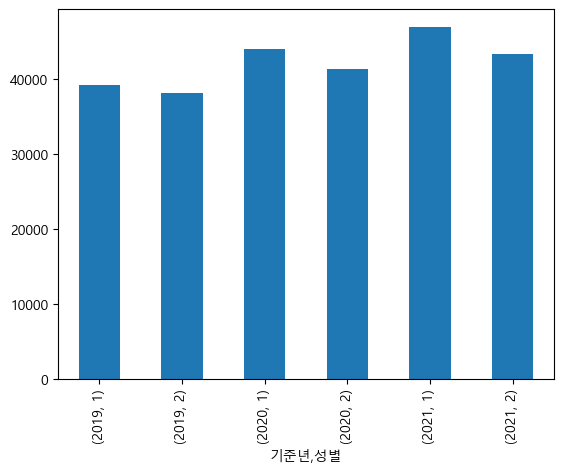

In [71]:
group_data.plot(kind='bar')

<Axes: xlabel='기준년'>

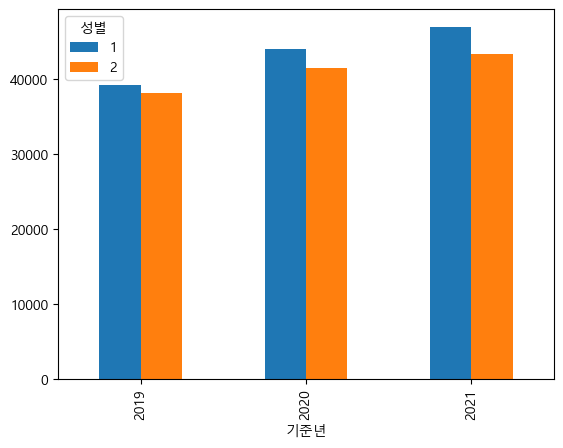

In [73]:
group_data.unstack().plot(kind='bar')

<Axes: xlabel='기준년'>

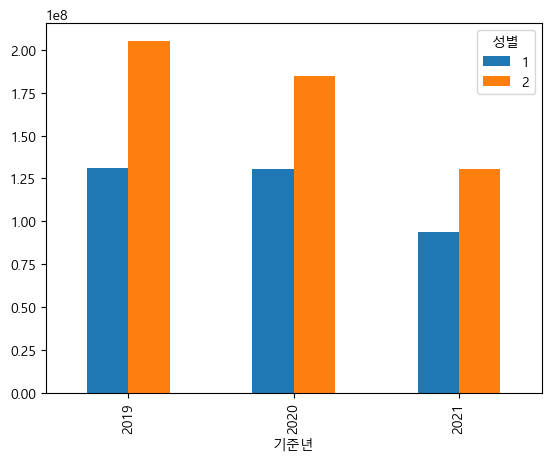

In [77]:
# 년도, 성별 이용 건수의 합계를 확인 
offline.pivot_table(
    index = '기준년', 
    columns = '성별', 
    values = '이용 건수',
    aggfunc= 'sum'
).plot(kind='bar')

<Axes: xlabel='기준년월'>

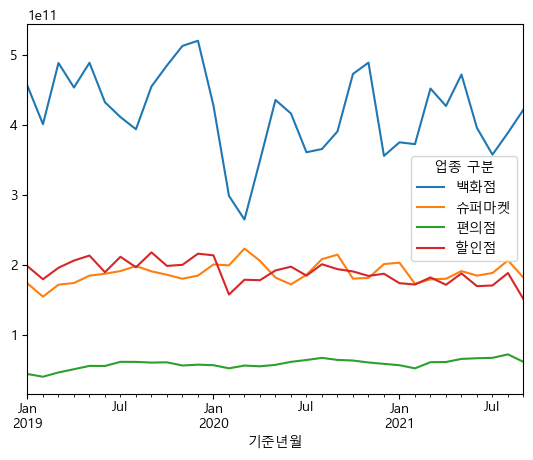

In [82]:

offline.pivot_table(
    index = '기준년월', 
    columns= '업종 구분', 
    values = '이용 금액', 
    aggfunc= 'sum'
).plot()

In [84]:
offline['연령대'].value_counts()

연령대
10    264
20    264
30    264
70    264
40    264
50    264
60    264
90    264
80    264
0     233
1      39
Name: count, dtype: int64

In [93]:
# 업종, 연령대 별로 월별 이용금액의 합계, 총 이용건수 
group_data2 = offline.pivot_table(
    index = '기준년', 
    columns = ['업종 구분', '연령대'], 
    values = ['이용 건수', '이용 금액'], 
    aggfunc= 'sum', 
    fill_value=0
)

In [94]:
df1 = group_data2['이용 건수']

In [95]:
df2 = group_data2['이용 금액']

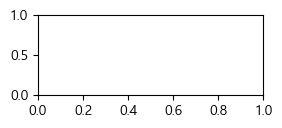

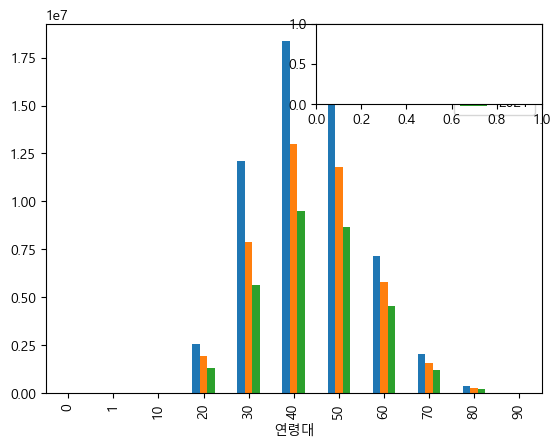

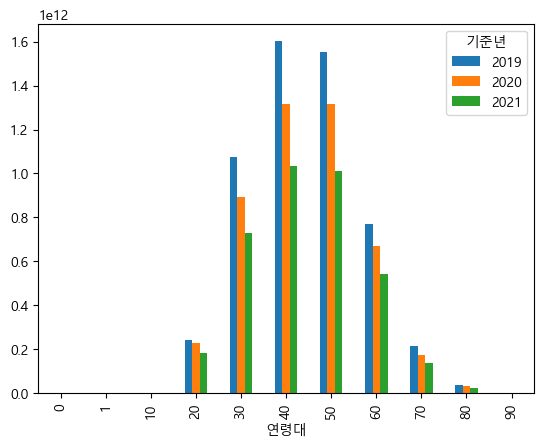

In [104]:
plt.subplot(4, 2, 1)
df1['백화점'].T.plot(kind='bar')
plt.subplot(4, 2, 2)
df2['백화점'].T.plot(kind='bar')
plt.show()

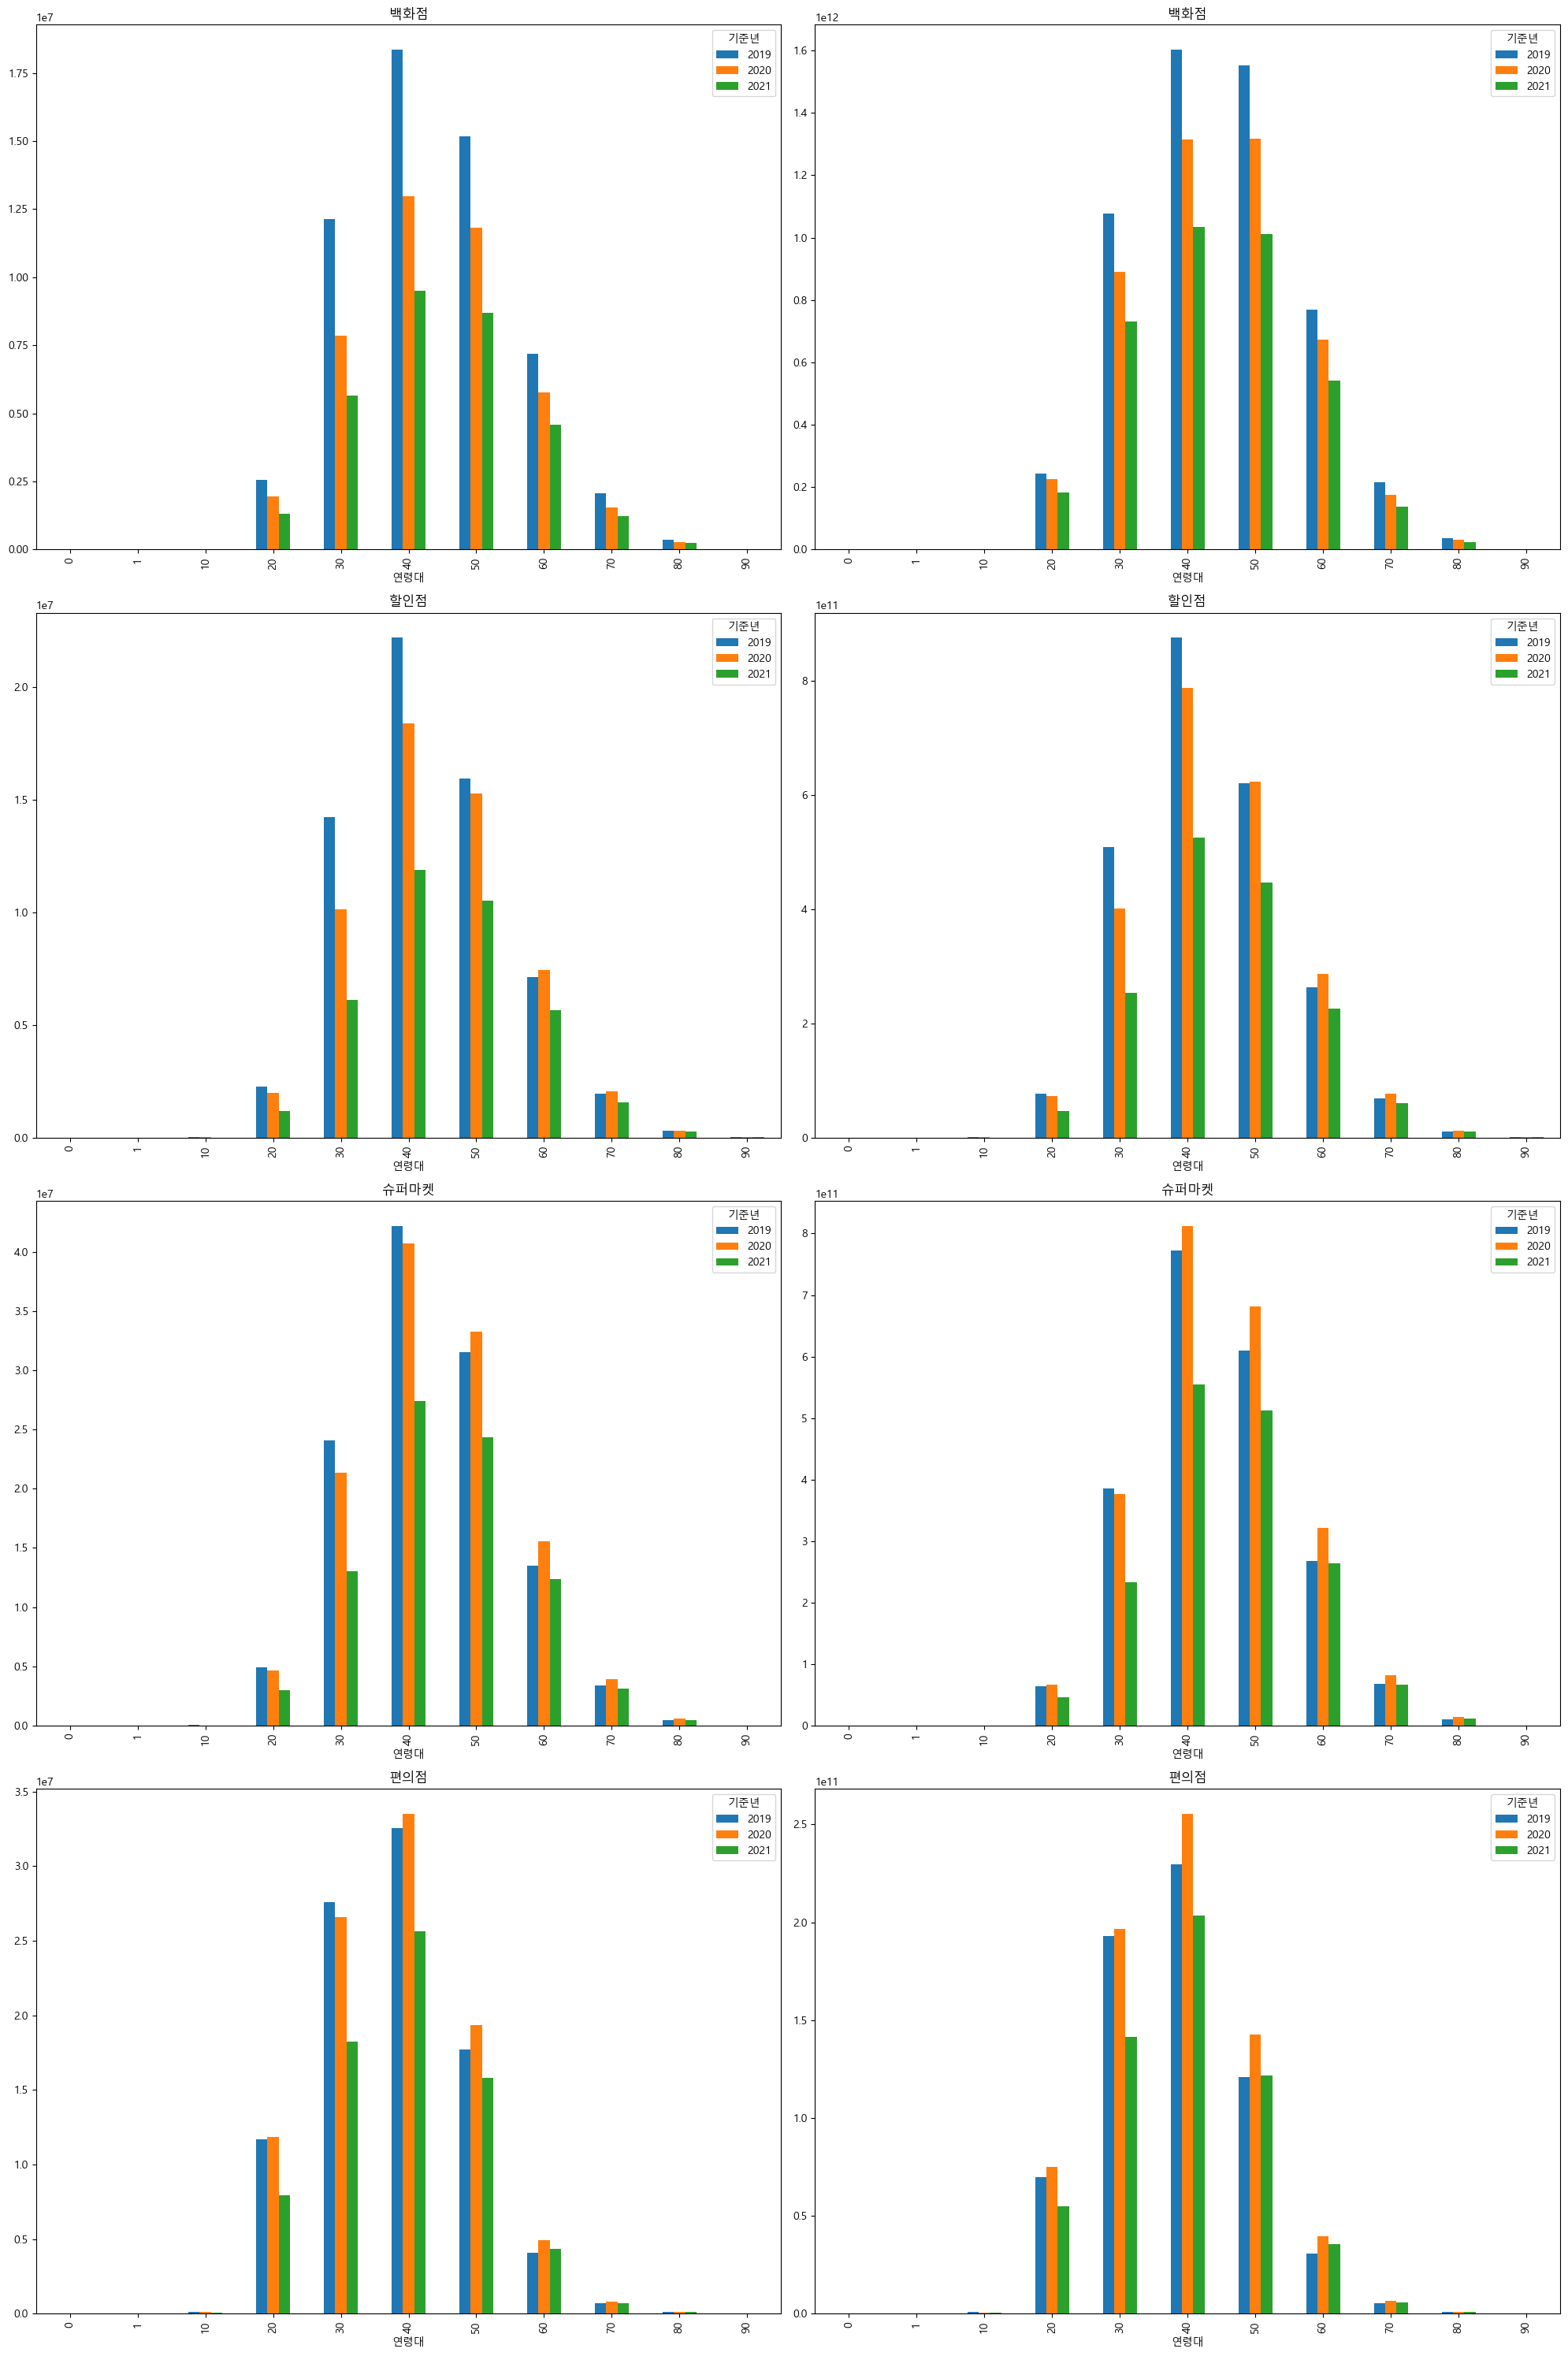

In [114]:
# 8(4*2)개의 공간을 생성하고 반복 실행할때 행이 1씩 증가하는 위치에 그래프 그린다. 
plt.figure(figsize=(20, 30))
# 업종의 수만큼 반복 실행
_list = offline['업종 구분'].unique()
for i in range(len(_list)):
    ax1 = plt.subplot(4, 2, i * 2 + 1)
    # df1의 특정 컬럼을 선택하고 전치하여 막대그래프로 표시 
    df1[_list[i]].T.plot(kind='bar', ax=ax1)
    # 그래프의 이름은 해당 컬럼의 이름으로 지정
    plt.title(_list[i])
    ax2 = plt.subplot(4, 2, i * 2 + 2)
    df2[_list[i]].T.plot(kind='bar', ax = ax2)
    plt.title(_list[i])

plt.tight_layout()
plt.show()

In [115]:
offline = pd.read_csv("../csv/card/오프라인.csv", encoding='cp949')

In [116]:
online = pd.read_csv('../csv/card/온라인.csv')

In [117]:
offline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   crym          2648 non-null   int64  
 1   tco_btc_nm    2648 non-null   object 
 2   ma_fem_dc     2648 non-null   int64  
 3   agegrp_dc     2648 non-null   int64  
 4   tco_btc_u_ct  2648 non-null   int64  
 5   tco_btc_u_am  2648 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 124.3+ KB


In [118]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   crym          651 non-null    int64
 1   ma_fem_dc     651 non-null    int64
 2   agegrp_dc     651 non-null    int64
 3   tco_btc_u_ct  651 non-null    int64
 4   tco_btc_u_am  651 non-null    int64
dtypes: int64(5)
memory usage: 25.6 KB


In [119]:
# offline 컬럼의 이름을 변경 
offline.columns = ['기준년월', '업종', '성별', '연령대', '이용건수', '이용금액']
# online 컬럼의 이름을 변경 
online.columns = ['기준년월', '성별', '연령대', '이용건수', '이용금액']

In [120]:
# offline과 online 데이터프레임의 구조를 동일하게 만들기 위해 online의 '업종' 컬럼을 추가 
online['업종'] = '온라인'

In [122]:
print(offline.columns)
print(online.columns)

Index(['기준년월', '업종', '성별', '연령대', '이용건수', '이용금액'], dtype='object')
Index(['기준년월', '성별', '연령대', '이용건수', '이용금액', '업종'], dtype='object')


In [127]:
df = pd.concat(
    [ online, offline ], 
    axis = 'index', 
    ignore_index=True
)

In [134]:
df.head(1)

,기준년월,성별,연령대,이용건수,이용금액,업종
0,2019-01-01,1,1,1,110685.0,온라인


<Axes: xlabel='기준년월'>

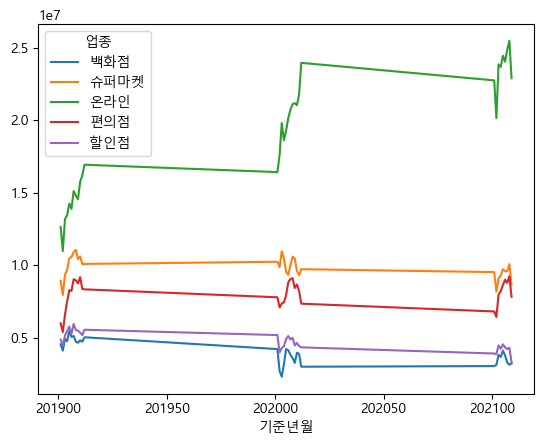

In [129]:
# 업종, 기준년월 별 총 이용건수의 그래프 시각화
df.pivot_table(
    index = '기준년월', 
    columns = '업종', 
    values = '이용건수', 
    aggfunc= 'sum'
).plot()

In [131]:
# 그래프로 시각화를 기준년월을 x축으로 지정을 하니 숫자형으로 인식하여 그래프 간격에 문제가 발생
# 기준년월을 시계열 데이터로 변경 
df['기준년월'] = pd.to_datetime(df['기준년월'], format = '%Y%m')

<Axes: xlabel='기준년월'>

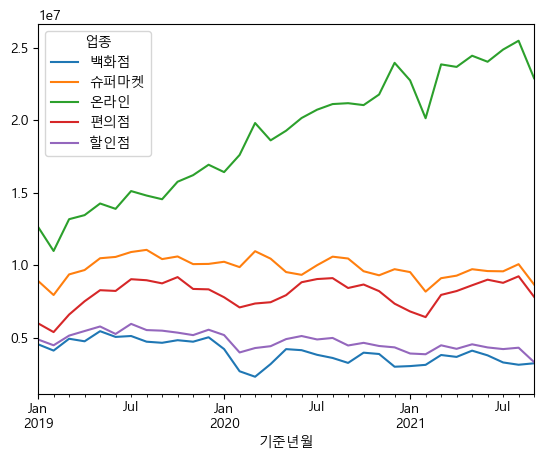

In [133]:
df.pivot_table(
    index = '기준년월', 
    columns = '업종', 
    values = '이용건수', 
    aggfunc= 'sum'
).plot()

- 온라인, 오프라인을 기준으로 총이용건수, 총이용금액을 그래프로 시각화 하여 출력
    - 파생변수 온/오프 생성하여 업종의 데이터의 값이 온라인이라면 0, 그외의 조건이라면 1

In [ ]:
# case1 : 반복문을 이용
# 반복횟수는 df의 길이만큼 , 업종 컬럼의 value가 온라인가?
# 빈 리스트에 반복할때마다 0, 1를 추가 
# 만들어진 리스트를 새로운 파생변수에 추가 
_list = []
# 위치를 기준으로 반복문 생성
for i in range(len(df)):
    # i에 대입이되는 데이터는 ? -> df의 index의 위치
    # 조건식 사용 
    if df.iloc[ i,  -1] == '온라인':
        _list.append(0)
    else:
        _list.append(1)

_list


In [ ]:
_list = [] 
# 1차원 데이터(Series)를 기준으로 반복문을 생성 
for name in df['업종']:
    # name에 대입되는 데이터는 ? -> Series에 Value가 하나씩 대입
    if name == '온라인':
        _list.append(0)
    else:
        _list.append(1)

_list

In [ ]:
# while문으로 반복 실행

_list2 = []
# 초기값
i = 0
while i < len(df):
    if df['업종'].iloc[i] == '온라인':
        _list2.append(0)
    else:
        _list2.append(1)
    i += 1
_list2

In [138]:
_list == _list2

True

In [139]:
df['on/off'] = _list

<Axes: xlabel='기준년월'>

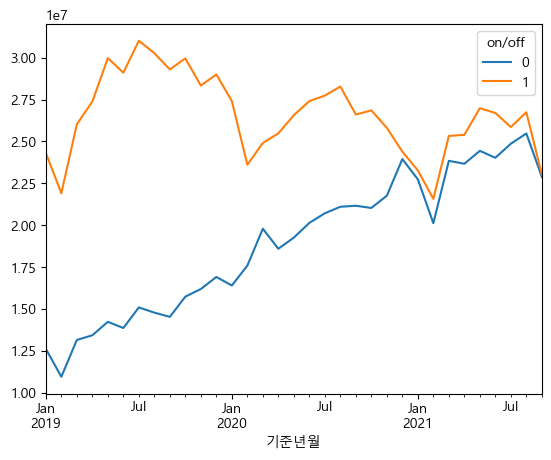

In [141]:
df.pivot_table(
    index = '기준년월', 
    columns = 'on/off', 
    values = '이용건수', 
    aggfunc= 'sum'
).plot()

In [145]:
# on/off2 컬럼을 생성하여 map() 데이터를 추가 
# lambda 에서 if문을 한줄로 표현 
# '참인 경우 데이터' if 조건식 else '거짓인 경우 데이터'
df['on/off2'] = df['업종'].map(
    lambda x : 0 if x == '온라인' else 1
)

In [148]:
(df['on/off'] == df['on/off2']).all()

np.True_

In [151]:
# 파생변수를 미리 생성하여 기본값을 설정 
df['on/off3'] = 1

flag = df['업종'] == '온라인'

df.loc[flag, 'on/off3'] = 0

In [155]:
df.loc[:, 'on/off' : 'on/off3'].sum(axis=1).value_counts()

3    2648
0     651
Name: count, dtype: int64

<Axes: xlabel='기준년월'>

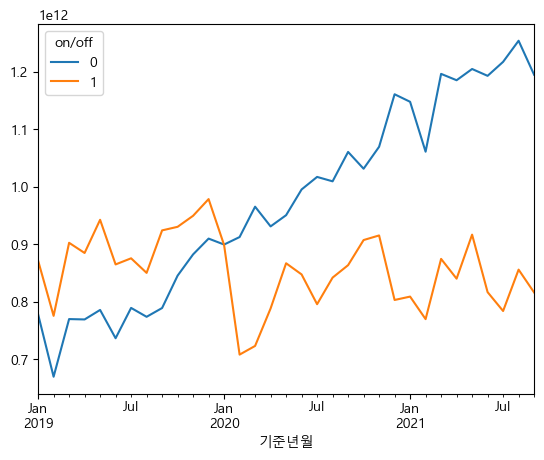

In [156]:
df.pivot_table(
    index = '기준년월', 
    columns = 'on/off', 
    values = '이용금액', 
    aggfunc= 'sum'
).plot()

<Axes: xlabel='기준년월'>

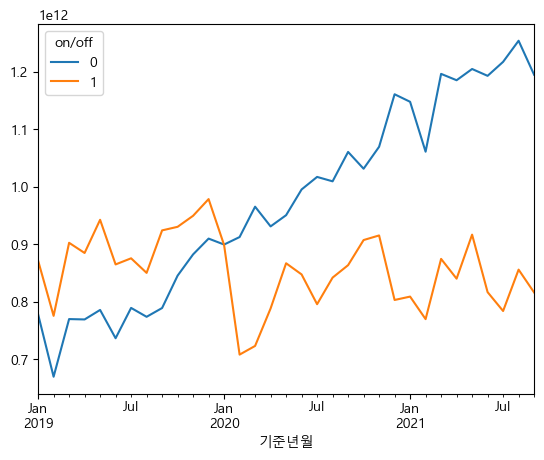

In [161]:
# groupby 함수를 이용해서 위와 같은 그래프를 생성 
df.groupby( ['기준년월', 'on/off'] )['이용금액'].sum().unstack().plot()